In [15]:
import pandas as pd 
from sklearn.model_selection import train_test_split

In [16]:
data = pd.read_csv('/Users/laikaiwen/Desktop/UCI MSBA/machine learning/project/archive-2/data/HR_dataset.csv')
data

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years Department  salary  
0                          0      sales     low  
1                          0      sales  medium  
2                          0      sales  medium  
3                          0      sales     low  
4                          0      sales     low  
...                      ...        ...     ...  
14994                      0    support     low  
14995                      0    support     low  
14996                      0    support     low  
14997                      0    support     low  
14998                      0    support     low  

[14999 rows x 10 columns]

# Data description 

In [17]:
data.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [18]:
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [19]:
data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

0    11428
1     3571
Name: left, dtype: int64

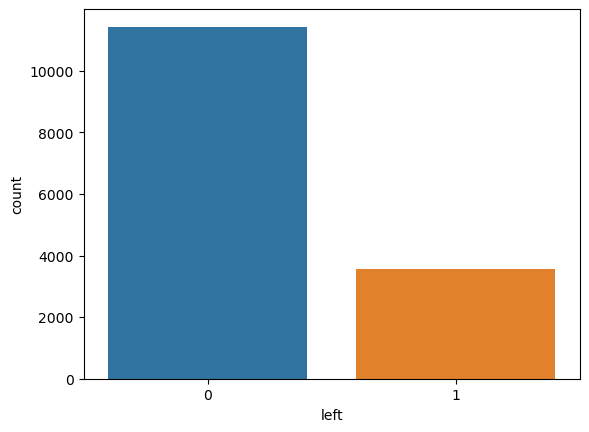

In [20]:
import seaborn as sns


sns.countplot(x = "left", data = data)
data.loc[:,"left"].value_counts()

In [21]:
import matplotlib.pyplot as plt

left = data.groupby('Department')['left'].sum()
left

Department
IT              273
RandD           121
accounting      204
hr              215
management       91
marketing       203
product_mng     198
sales          1014
support         555
technical       697
Name: left, dtype: int64

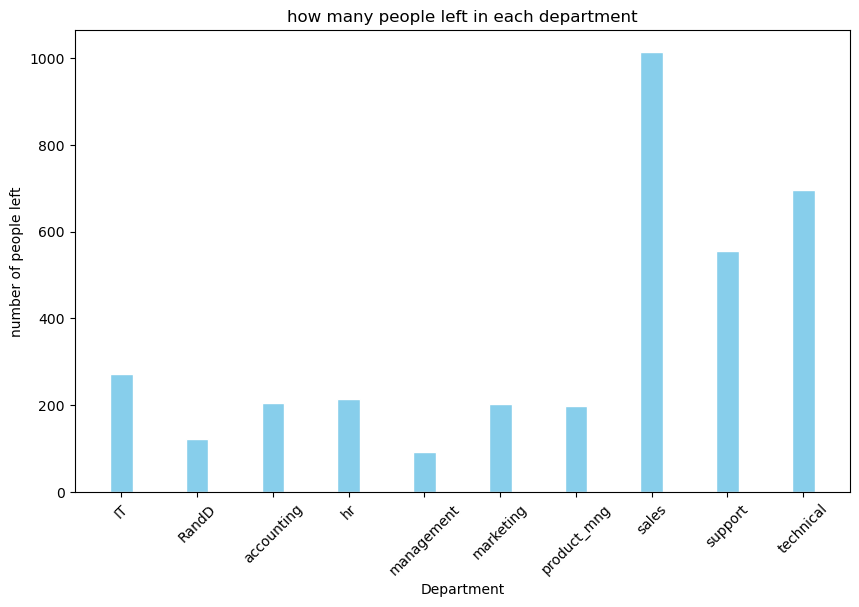

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(left.index,left, color='skyblue', edgecolor='white', width=0.3)
plt.xlabel('Department')
plt.ylabel('number of people left')
plt.title('how many people left in each department')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

/var/folders/1k/03gv_xvd763c_7v1mkkyhljr0000gn/T/ipykernel_35786/1346936828.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data.corr(), annot=True, cmap=sns.color_palette("coolwarm", as_cmap=True)) #annot = true: show number in each square.


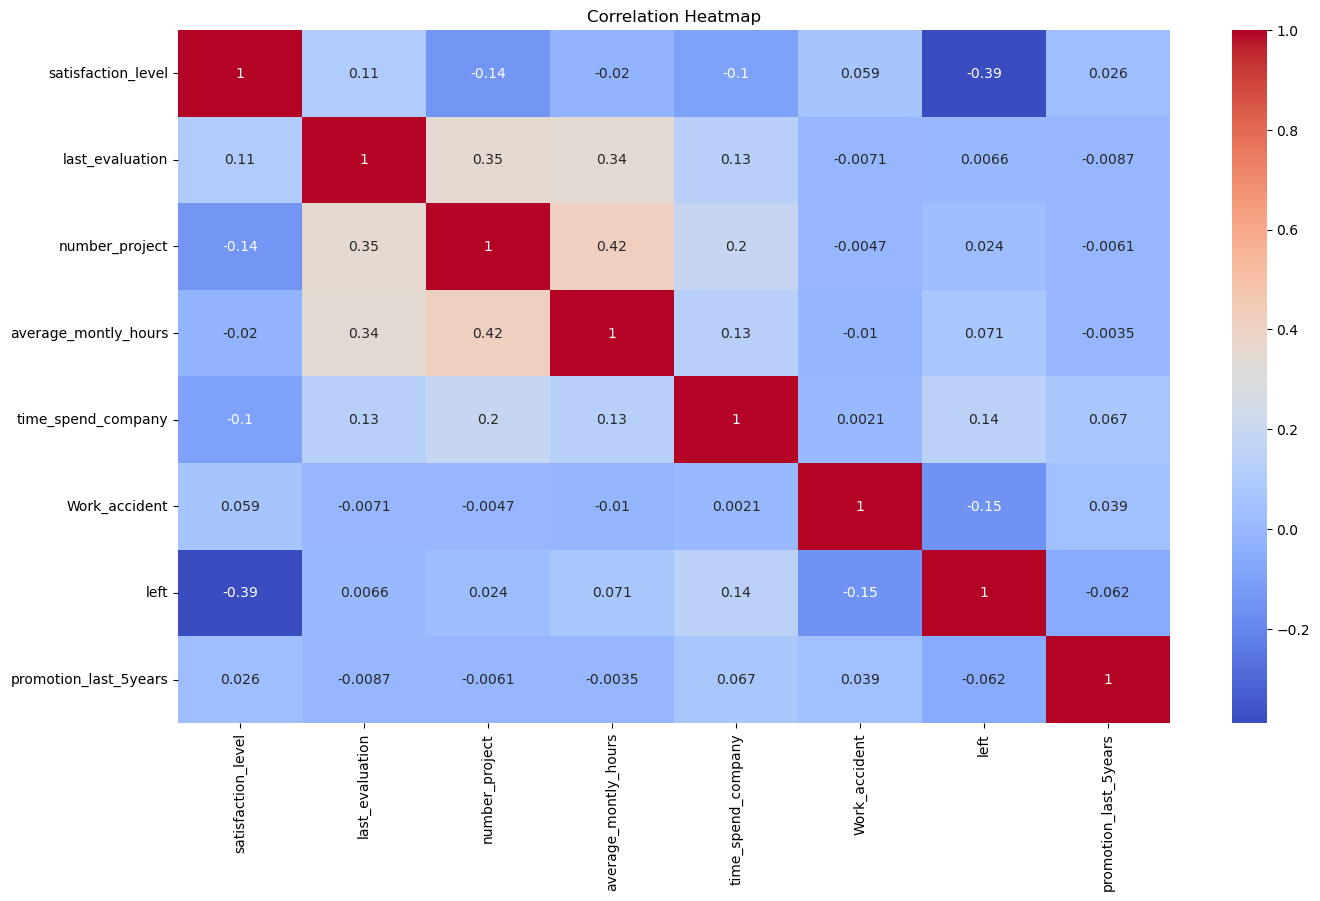

In [23]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(data.corr(), annot=True, cmap=sns.color_palette("coolwarm", as_cmap=True)) #annot = true: show number in each square.
heatmap.set_title('Correlation Heatmap');

# Model1 - logistic regression 

We choose logistic regression mainly based on two reason.
1. In this dataset it involves binary classification which suits the task of Binomial logistic regression.
2. This dataset  doesnt contain lots of data(only 15000), and logistic regression can predict better than tree model in small dataset.

# without preprocessing 

In [24]:
df1 = data.copy()
df1 = data.drop('Department',axis =1)
df1['salary'] = (
    df1['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

In [25]:
from sklearn.linear_model import LogisticRegression
train_df, test_df = train_test_split(df1, test_size = 0.2, random_state= 41)

y_train = train_df['left']
y_test  = test_df['left']

x_train = train_df.drop('left',axis = 1)
x_test = test_df.drop('left', axis =1)

In [26]:
logreg_model = LogisticRegression(solver='liblinear', random_state=41)
logreg_model.fit(x_train, y_train)

LogisticRegression(random_state=41, solver='liblinear')

In [27]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l2']}, 
              {'C':[0.01, 0.1, 10, 100]}]  #1/lambda 


grid_search = GridSearchCV(estimator = logreg_model,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, #折數
                           verbose=0) #0 表示不輸出
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=41, solver='liblinear'),
             param_grid=[{'penalty': ['l2']}, {'C': [0.01, 0.1, 10, 100]}],
             scoring='accuracy')

In [28]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.7951


Parameters that give the best results : 

 {'C': 100}


Estimator that was chosen by the search : 

 LogisticRegression(C=100, random_state=41, solver='liblinear')


In [29]:
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(x_test, y_test)))

GridSearch CV score on test set: 0.7890


In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_pred = logreg_model.predict(x_test)
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))
f1 = f1_score(y_test, y_pred, average="weighted")  
print('F1 Score: ',f1)

Accuracy Score: 0.7883333333333333
F1 Score:  0.7711112045408975


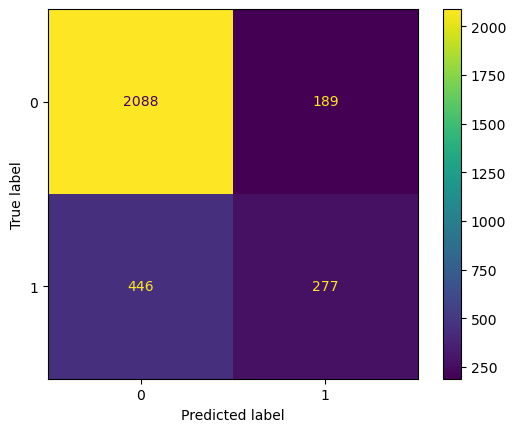

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

# Data preprocessing 

In [35]:
df = data.copy()
df.duplicated().sum()  
df = df.drop_duplicates(keep='first')

0    10000
1     1991
Name: left, dtype: int64

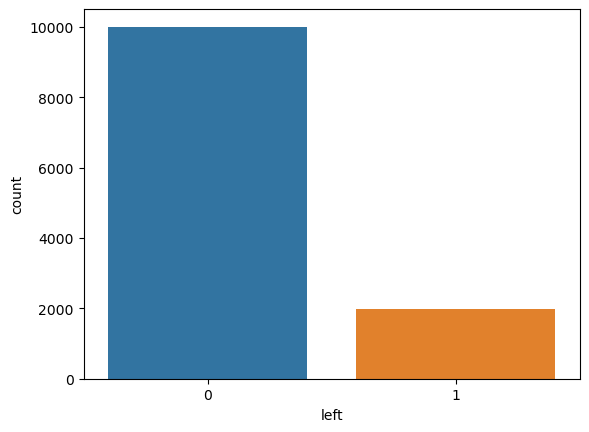

In [36]:
sns.countplot(x = "left", data = df)
df.loc[:,"left"].value_counts()

In [37]:
df['salary'] = (                                  # change salary to low = 0, medium = 1, high = 2 
    df['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

df = pd.get_dummies(df, drop_first=False)       # change department to dummy         

df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  salary  \
0                   3              0     1                      0       0   
1                   6              0     1                      0       1   
2                   4              0     1                      0       1   
3                   5              0     1                      0       0   
4                   3              0     1                      0       0   

   Department_IT  Department_RandD  Department_accounting  Department_hr  \
0              0                 0                      0              0   
1              0                 0                      0              0   
2              0                 0                      0              0   
3              0                 0                      0              0   
4              0                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   Department_sales  Department_support  Department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

# logistic regression after data preprocessing 

In [38]:
train_df, test_df = train_test_split(df, test_size = 0.2, random_state= 42)
 
#Separate target label
y_train = train_df['left']
y_test  = test_df['left']

x_train = train_df.drop('left',axis = 1)
x_test = test_df.drop('left', axis =1)

In [39]:
from sklearn.linear_model import LogisticRegression

# Apply logistic regression model to training data
logreg_model = LogisticRegression(solver='liblinear', random_state=42)
logreg_model.fit(x_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [40]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l2']}, 
              {'C':[0.01, 0.1, 10, 100]}]


grid_search = GridSearchCV(estimator = logreg_model,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, #折數
                           verbose=0) #0 表示不輸出

# performing grid search on the training data set
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid=[{'penalty': ['l2']}, {'C': [0.01, 0.1, 10, 100]}],
             scoring='accuracy')

In [41]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8331


Parameters that give the best results : 

 {'C': 0.1}


Estimator that was chosen by the search : 

 LogisticRegression(C=0.1, random_state=42, solver='liblinear')


In [42]:
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(x_test, y_test)))

GridSearch CV score on test set: 0.8299


In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
y_pred = logreg_model.predict(x_test)
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))

f1 = f1_score(y_test, y_pred, average="weighted")
print('F1 Score: ',f1)

Accuracy Score: 0.8286786160900376
F1 Score:  0.7894945116351445


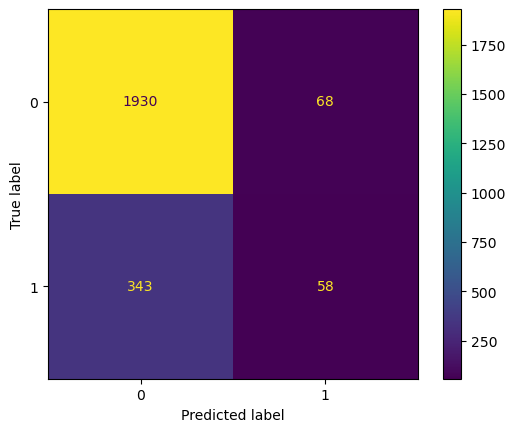

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

After preprocessing the data, our CV score for the test data increased from 0.789 to 0.8299.

In this process, we primarily performed two steps. Firstly, we identified several instances of duplicate data in our dataset. Given that we have more than ten columns, it is implausible for multiple employees to have the exact same characteristics. Therefore, we considered these instances as duplicate data and removed them. Secondly, we transformed two columns in the dataset into numerical data. For the 'salary' column, since it consists of ordinal categories, we converted the values [low, medium, high] to [0, 1, 2]. As for the 'department' column, we transformed it into dummy variables to enable its usage in the model.

# further data preprocessing

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
dfs = data.copy() 
dfs = dfs.drop_duplicates(keep='first')

dfs['salary'] = (                                  # change salary to low = 0, medium = 1, high = 2 
    dfs['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)    
dfs

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11995                0.90             0.55               3   
11996                0.74             0.95               5   
11997                0.85             0.54               3   
11998                0.33             0.65               3   
11999                0.50             0.73               4   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
11995                   259                  10              1     0   
11996                   266                  10              0     0   
11997                   185                  10              0     0   
11998                   172                  10              0     0   
11999                   180                   3              0     0   

       promotion_last_5years  Department  salary  
0                          0       sales       0  
1                          0       sales       1  
2                          0       sales       1  
3                          0       sales       0  
4                          0       sales       0  
...                      ...         ...     ...  
11995                      1  management       2  
11996                      1  management       2  
11997                      1  management       2  
11998                      1   marketing       2  
11999                      0          IT       0  

[11991 rows x 10 columns]

In [47]:
scaler = StandardScaler()
# Fit and transform the scaler to the data
l1 = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','salary']
standardized_data = scaler.fit_transform(dfs[l1])

# Convert the standardized data to a DataFrame for better visualization
standardized_df = pd.DataFrame(data=standardized_data, columns=l1)
standardized_df['left'] = dfs['left']
#standardized_df['salary'] = dfs['salary']
standardized_df['Department'] = dfs['Department']
standardized_df = pd.get_dummies(standardized_df, drop_first=False)       # change department to dummy         
standardized_df

satisfaction_level  last_evaluation  number_project  \
0               -1.035668        -1.108990       -1.549921   
1                0.706637         0.851380        1.029194   
2               -2.155721         0.970190        2.748604   
3                0.374770         0.910785        1.029194   
4               -1.077151        -1.168396       -1.549921   
...                   ...              ...             ...   
11986            1.121472        -0.990180       -0.690216   
11987            0.457736         1.386026        1.029194   
11988            0.914054        -1.049585       -0.690216   
11989           -1.243085        -0.396129       -0.690216   
11990           -0.537867         0.079113        0.169489   

       average_montly_hours  time_spend_company  Work_accident  \
0                 -0.892208           -0.274291      -0.427116   
1                  1.262709            1.981036      -0.427116   
2                  1.467939            0.477485      -0.427116   
3                  0.462311            1.229261      -0.427116   
4                 -0.851162           -0.274291      -0.427116   
...                     ...                 ...            ...   
11986              1.201140            4.988139       2.341286   
11987              1.344801            4.988139      -0.427116   
11988             -0.317563            4.988139      -0.427116   
11989             -0.584363            4.988139      -0.427116   
11990             -0.420178           -0.274291      -0.427116   

       promotion_last_5years    salary  left  Department_IT  Department_RandD  \
0                  -0.131228 -0.949670   1.0              0                 0   
1                  -0.131228  0.622971   1.0              0                 0   
2                  -0.131228  0.622971   1.0              0                 0   
3                  -0.131228 -0.949670   1.0              0                 0   
4                  -0.131228 -0.949670   1.0              0                 0   
...                      ...       ...   ...            ...               ...   
11986               7.620300  2.195611   0.0              1                 0   
11987               7.620300  2.195611   0.0              0                 0   
11988               7.620300  2.195611   0.0              0                 0   
11989               7.620300  2.195611   0.0              0                 0   
11990              -0.131228 -0.949670   0.0              0                 0   

       Department_accounting  Department_hr  Department_management  \
0                          0              0                      0   
1                          0              0                      0   
2                          0              0                      0   
3                          0              0                      0   
4                          0              0                      0   
...                      ...            ...                    ...   
11986                      0              0                      0   
11987                      0              0                      0   
11988                      0              0                      0   
11989                      0              0                      0   
11990                      0              0                      0   

       Department_marketing  Department_product_mng  Department_sales  \
0                         0                       0                 1   
1                         0                       0                 1   
2                         0                       0                 1   
3                         0                       0                 1   
4                         0                       0                 1   
...                     ...                     ...               ...   
11986                     0                       0                 0   
11987                     0                       1                 0  

In [48]:
standardized_df.dropna(inplace = True)

In [49]:
train_df, test_df = train_test_split(standardized_df, test_size = 0.2, random_state= 43)
 
#Separate target label
y_train = train_df['left']
y_test  = test_df['left']

x_train = train_df.drop('left',axis = 1)
x_test = test_df.drop('left', axis =1)

In [50]:
from sklearn.linear_model import LogisticRegression

# Apply logistic regression model to training data
logreg_model = LogisticRegression(solver='liblinear', random_state=43)
logreg_model.fit(x_train, y_train)

LogisticRegression(random_state=43, solver='liblinear')

In [51]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l2']}, 
              {'C':[0.01, 0.1, 10, 100]}]


grid_search = GridSearchCV(estimator = logreg_model,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, #折數
                           verbose=0) #0 表示不輸出

# performing grid search on the training data set
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=43, solver='liblinear'),
             param_grid=[{'penalty': ['l2']}, {'C': [0.01, 0.1, 10, 100]}],
             scoring='accuracy')

In [52]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8362


Parameters that give the best results : 

 {'C': 0.01}


Estimator that was chosen by the search : 

 LogisticRegression(C=0.01, random_state=43, solver='liblinear')


In [53]:
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(x_test, y_test)))

GridSearch CV score on test set: 0.8260


In [56]:
y_pred = logreg_model.predict(x_test)
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))

f1 = f1_score(y_test, y_pred, average="weighted")
print('F1 Score: ',f1)

Accuracy Score: 0.8247809762202754
F1 Score:  0.7924763039376033


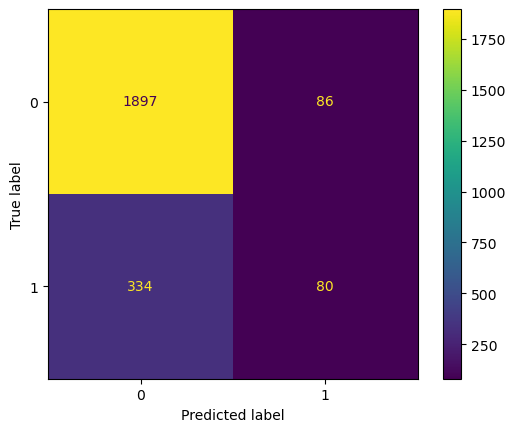

In [55]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

We performed further preprocessing by standardizing the data. However, the results of the model indicate that it did not increase our overall accuracy. Nevertheless, upon analyzing the confusion matrix, we discovered that standardized data can aid in predicting more 'True positives,' which refers to employees who may leave. From the perspective of the company wanting to retain their employees, this could be beneficial as it helps predict more TP.

# Model2 - Decision tree 

We chose the decision tree model because our dataset contains both numeric and categorical data. Additionally, based on the heatmap above, we believe that certain attributes may carry more weight than others. The tree model can help us effectively handle data with such variations. 

In [57]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# without preprocessing 

In [58]:
df_tree = data.copy()
df_tree.drop(['salary','Department'],axis =1 ,inplace = True)
train_df, test_df = train_test_split(df_tree, test_size = 0.5, random_state= 33)


train_y = train_df['left']
test_y = test_df['left']

train_x = train_df.drop(['left'], axis = 1)
test_x = test_df.drop(['left'], axis = 1)


In [59]:
from sklearn.tree import DecisionTreeClassifier

#build decision tree
model = DecisionTreeClassifier(criterion='entropy')

model.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy')

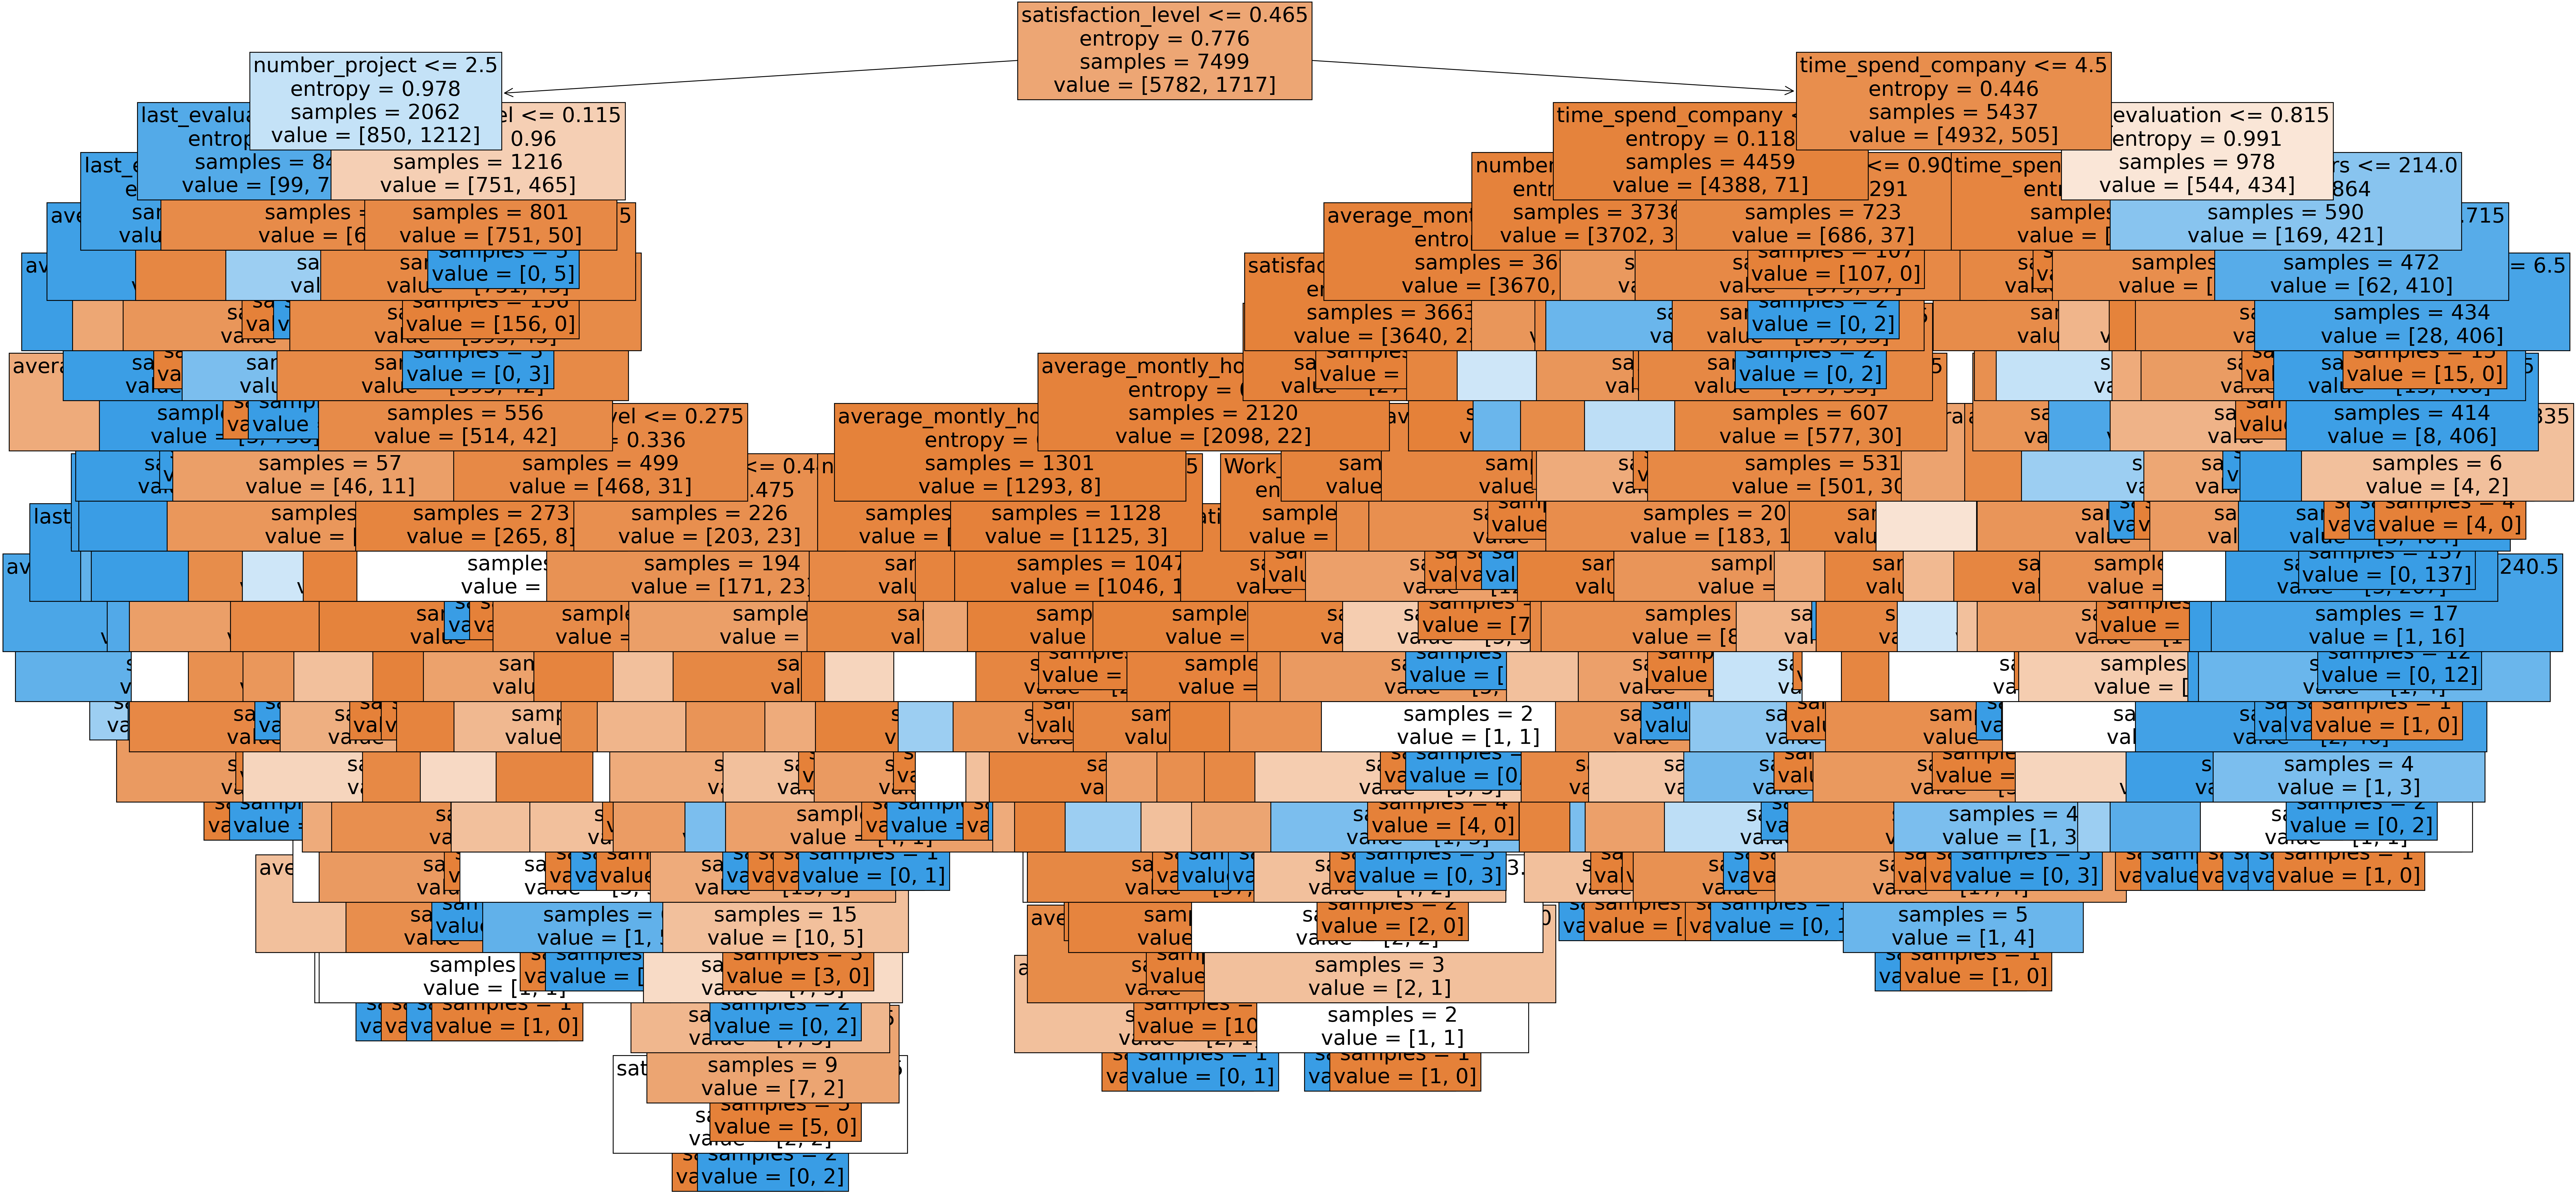

In [ ]:
from sklearn import tree

# features
features = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','salary']


#figsize value changes the size of plot
fig, ax = plt.subplots(figsize=(48, 24), dpi=200)
tree.plot_tree(model,ax=ax,feature_names=features, filled=True, fontsize=24)
plt.show()

In [61]:
xlabel = ['pred_negative','pred_positive']
ylabel = ['true_negative','true_positive']
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    # When annot is set to True, it adds text annotations to each cell of the heatmap.
    sns.heatmap(cf,annot=True,yticklabels=ylabel,xticklabels=xlabel,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 0.9998666488865182
Test score 0.9730666666666666
Train Confusion matrix


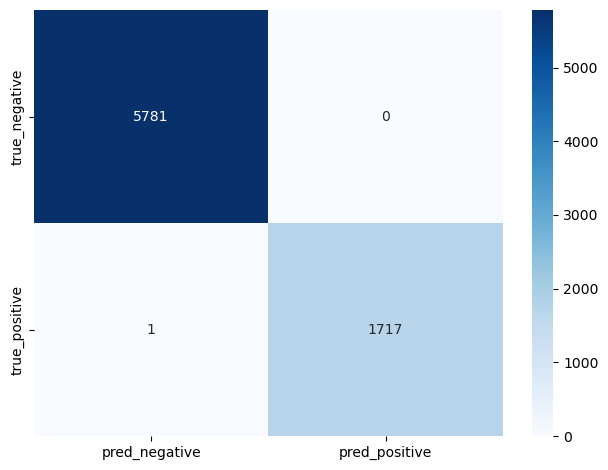

Test Confusion matrix


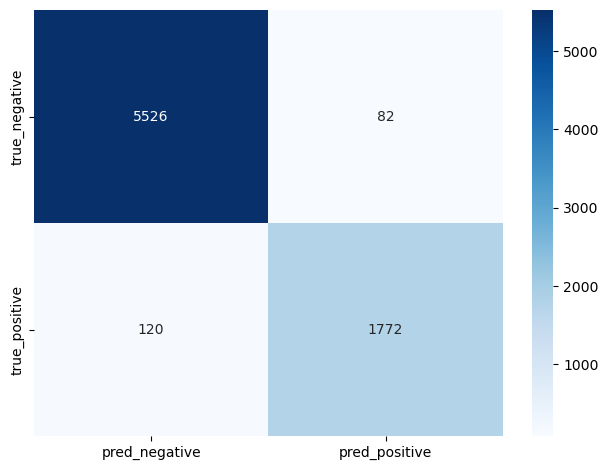

In [62]:
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_train_pred = model.predict(train_x)
y_test_pred  = model.predict(test_x)
print(f'Train score {accuracy_score(y_train_pred,train_y)}')
print(f'Test score {accuracy_score(y_test_pred,test_y)}')
plot_confusionmatrix(y_train_pred,train_y,dom='Train')
plot_confusionmatrix(y_test_pred,test_y,dom='Test')

training dataset has overfitting problem 

# Data preprocessing and prepruning the tree

In [63]:
df_tree = data.copy()
df_tree.duplicated().sum()  
df_tree = df_tree.drop_duplicates(keep='first')
df_tree['salary'] = (                                  # change salary to low = 0, medium = 1, high = 2 
    df_tree['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)
df_tree.drop('Department',axis=1, inplace =True)

In [64]:
train_df, test_df = train_test_split(df_tree, test_size = 0.5, random_state= 33)


train_y = train_df['left']
test_y = test_df['left']

train_x = train_df.drop(['left'], axis = 1)
test_x = test_df.drop(['left'], axis = 1)

In [65]:
from sklearn import tree
params = {'max_depth': [2,4,6,8],                  
         'min_samples_split': [100,200,300],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params) 
gcv.fit(train_x,train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [100, 200, 300]})

In [66]:
model = gcv.best_estimator_
print("Best Fit Model")
print(model)

Best Fit Model
DecisionTreeClassifier(max_depth=8, min_samples_split=100)


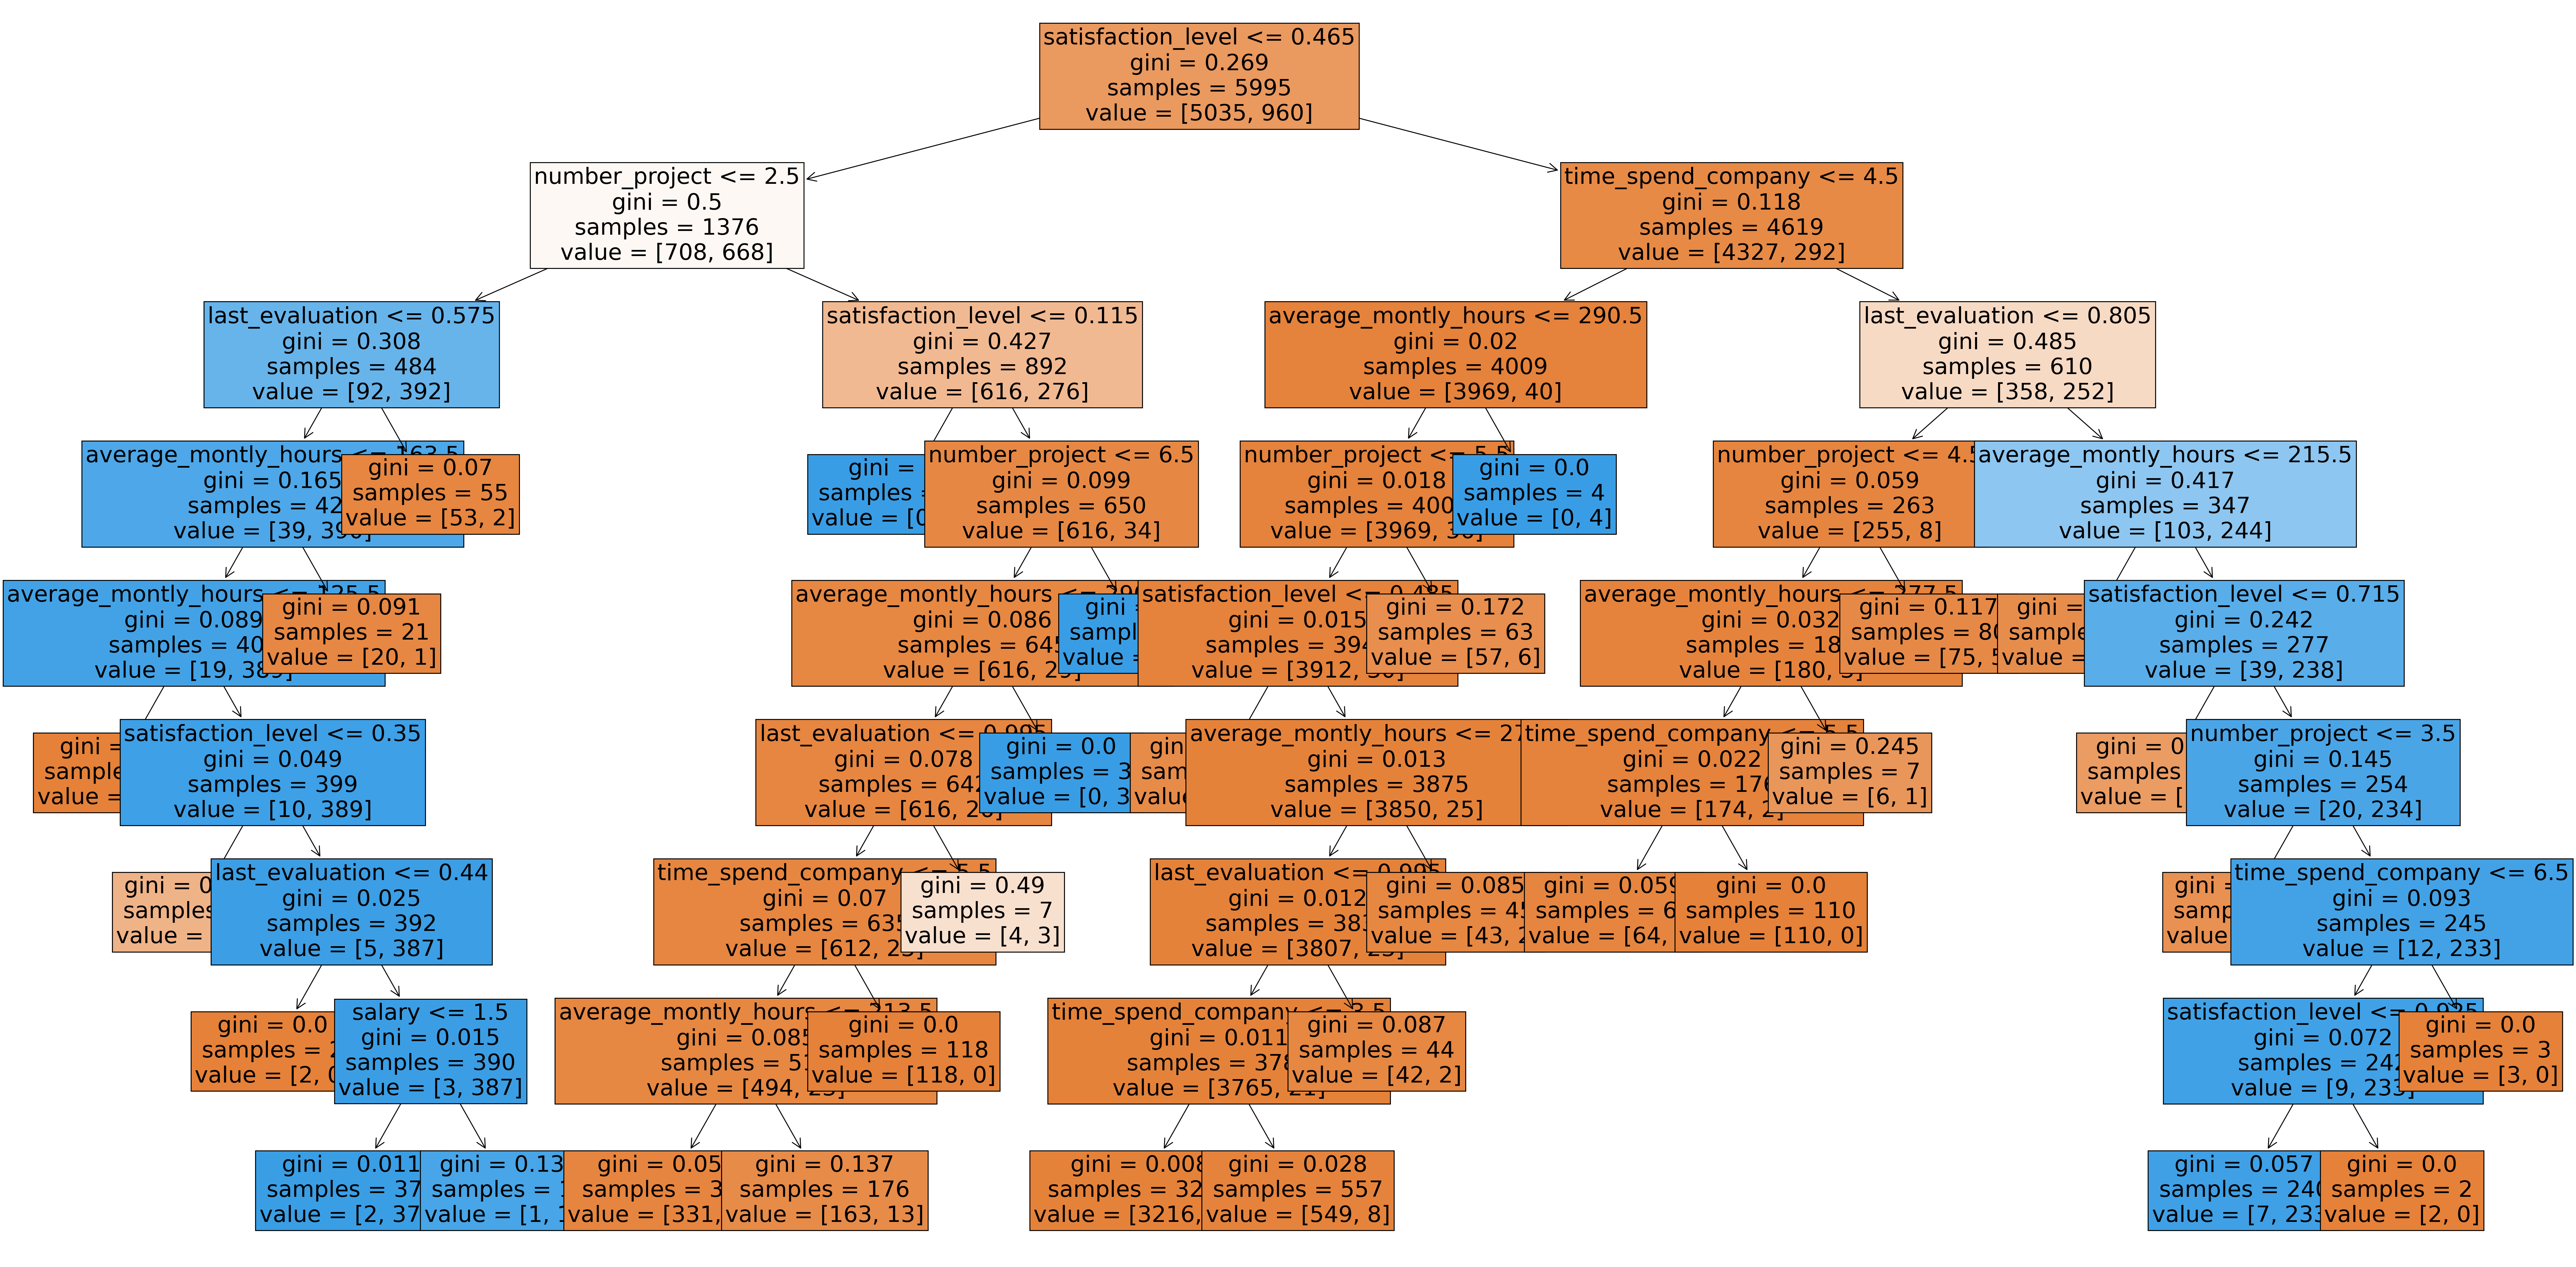

In [67]:
from sklearn import tree

# features
features = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','salary']


#figsize value changes the size of plot
fig, ax = plt.subplots(figsize=(48, 24), dpi=200)
tree.plot_tree(model,ax=ax,feature_names=features, filled=True, fontsize=24)
plt.show()

Train score 0.9839866555462886
Test score 0.985657104736491
Train Confusion matrix


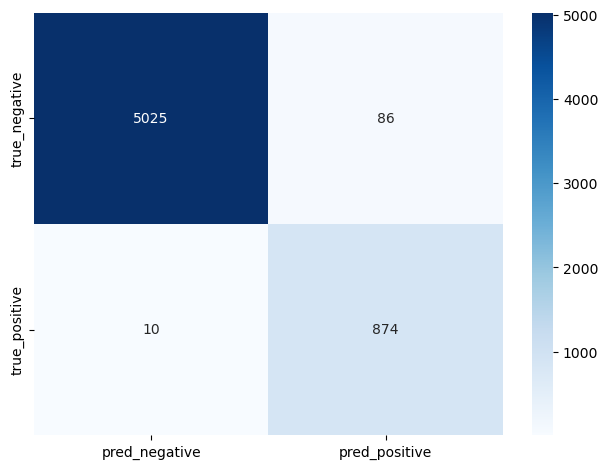

Test Confusion matrix


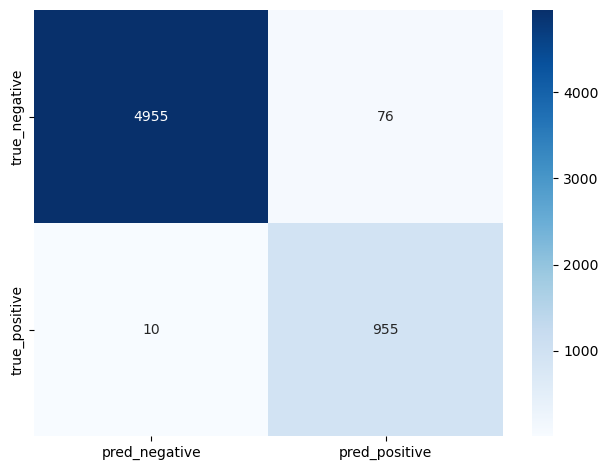

In [68]:
model.fit(train_x,train_y)
y_train_pred = model.predict(train_x)
y_test_pred = model.predict(test_x)

print(f'Train score {accuracy_score(y_train_pred,train_y)}')
print(f'Test score {accuracy_score(y_test_pred,test_y)}')
plot_confusionmatrix(y_train_pred,train_y,dom='Train')
plot_confusionmatrix(y_test_pred,test_y,dom='Test')